# LSTM aplicado a série de Fibonacci

In [2]:
# !pip install numpy==1.19.5

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\jeffe\\anaconda3\\Lib\\site-packages\\~2mpy\\.libs\\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0


## Packages

In [1]:
import numpy as np
print(np.__version__)

from tensorflow.keras.optimizers import Adam

1.19.5


In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
import matplotlib.pyplot as plt

In [32]:
import pandas as pd

## Tratando os dados

In [4]:
def fibonacci_lista(n):
    if n <= 0:
        return "O número deve ser maior que zero."
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib = [0, 1]
        while len(fib) < n:
            fib.append(fib[-1] + fib[-2])
        return fib

In [5]:
dados = fibonacci_lista(20)

In [6]:
dados_t = fibonacci_lista(30)

In [7]:
dados_t

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229]

In [8]:
conj_treino = dados[:10]
conj_valid = dados[10:15]
# conj_teste = dados[15:20]

In [9]:
conj_teste = dados_t[15:30]

- Criando os arrays

In [10]:
conj_treino = np.array(conj_treino, dtype='int32')
conj_valid = np.array(conj_valid, dtype='int32')
conj_teste = np.array(conj_teste, dtype='int32')


In [11]:
conj_valid

array([ 55,  89, 144, 233, 377])

In [12]:
conj_treino = conj_treino[:, np.newaxis]
conj_valid = conj_valid[:, np.newaxis]
conj_teste = conj_teste[:, np.newaxis]

In [13]:
conj_treino[0:2, 0]

array([0, 1])

- Construindo o tensor input

In [14]:
X_treino = []
y_treino = []
for i in range(3, conj_treino.shape[0]):
    X_treino.append(conj_treino[i-3:i, 0])
    y_treino.append(conj_treino[i, 0])


X_treino, y_treino = np.array(X_treino), np.array(y_treino)

X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))

In [47]:
y_treino

array([ 2,  3,  5,  8, 13, 21, 34])

In [17]:
X_valid = []
y_valid = []
for i in range(3, conj_valid.shape[0]):
    X_valid.append(conj_valid[i-3:i, 0])
    y_valid.append(conj_valid[i, 0])


X_valid, y_valid = np.array(X_valid), np.array(y_valid)
# print(X_valid.shape)

X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [46]:
y_valid

array([233, 377])

In [18]:
X_teste = []
y_teste = []
for i in range(3, conj_teste.shape[0]):
    X_teste.append(conj_teste[i-3:i, 0])
    y_teste.append(conj_teste[i, 0])


X_teste, y_teste = np.array(X_teste), np.array(y_teste)

X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [45]:
y_teste

array([  2584,   4181,   6765,  10946,  17711,  28657,  46368,  75025,
       121393, 196418, 317811, 514229])

## Modelo

In [27]:
modelo_fibonacci = Sequential()

modelo_fibonacci.add(LSTM(units=50, input_shape = (X_treino.shape[1], 1), activation='relu')) 

# modelo_fibonacci.add(LSTM(units=50))
# modelo_fibonacci.add(Dropout(0.25))

modelo_fibonacci.add(Dense(units=1))

modelo_fibonacci.compile(optimizer=Adam(lr=0.01), 
                         loss='mean_absolute_error', metrics=['accuracy'])

modelo_fibonacci.fit(X_treino, y_treino, epochs=100, batch_size=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
1/1 [==============================] - 0s 254ms/step - loss: 12.2606 - accuracy: 0.0000e+00 - val_loss: 291.1658 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 11.8714 - accuracy: 0.0000e+00 - val_loss: 278.8784 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4758 - accuracy: 0.0000e+00 - val_loss: 250.7572 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 11.0408 - accuracy: 0.0000e+00 - val_loss: 236.1871 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5181 - accuracy: 0.0000e+00 - val_loss: 220.4824 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 9.8678 - accuracy: 0.0000e+00 - val_loss: 201.2091 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 9.0396 - accuracy: 0.0

In [28]:
# Predictions
# test_data = np.array([89,144,233,377,610], dtype=np.float32)
# test_data = test_data.reshape((1, 5, 1))

# Predicting the 16th number
predict_next_fib = modelo_fibonacci.predict(X_teste, verbose=1)

1/1 [==============================] - 0s 0s/step


## Metricas

In [29]:
predict_next_fib_new = np.reshape(predict_next_fib, (predict_next_fib.shape[0],))

predict_next_fib_new

array([  2516.0774,   4077.988 ,   6604.264 ,  10687.291 ,  17291.04  ,
        27975.72  ,  45263.887 ,  73236.73  , 118497.734 , 191731.58  ,
       310226.47  , 501955.12  ], dtype=float32)

In [23]:
y_teste

array([  2584,   4181,   6765,  10946,  17711,  28657,  46368,  75025,
       121393, 196418, 317811, 514229])

In [40]:
dicio = {
    "Previsão": predict_next_fib_new,
    "Reais": y_teste
}

df = pd.DataFrame(dicio)
df["Erro Relativo"] = (df["Reais"] - df["Previsão"])/df["Reais"] 

In [41]:
df

,Previsão,Reais,Erro Relativo
0,2516.077393,2584,0.026286
1,4077.988037,4181,0.024638
2,6604.264160,6765,0.023760
3,10687.291016,10946,0.023635
4,17291.039062,17711,0.023712
5,27975.720703,28657,0.023774
6,45263.886719,46368,0.023812
7,73236.726562,75025,0.023836
8,118497.734375,121393,0.023850
9,191731.578125,196418,0.023859


> Em geral, o modelo apresentou um erro de 24%

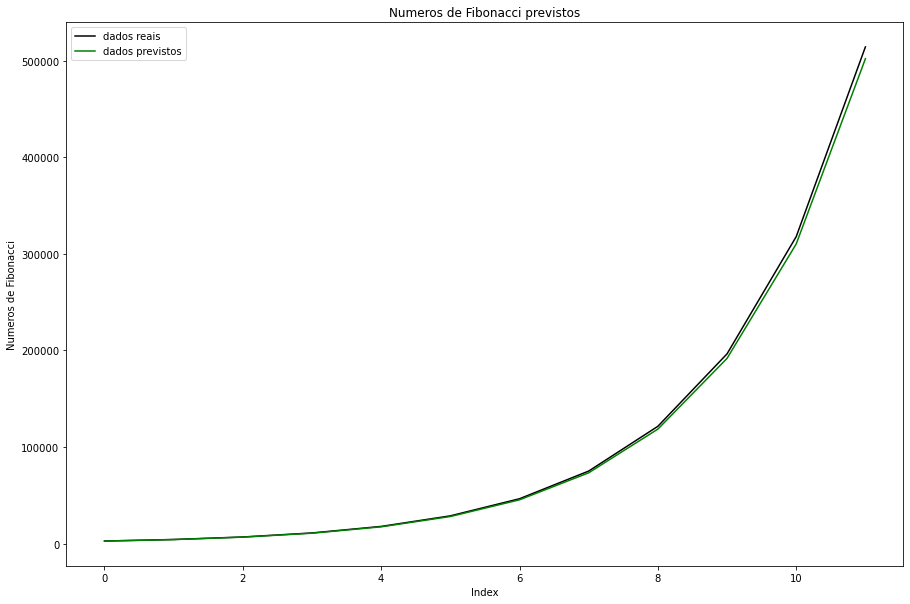

In [30]:
plt.figure(figsize=(15, 10))
plt.plot(y_teste, color = 'black', label = 'dados reais')
plt.plot(predict_next_fib, color = 'green', label = 'dados previstos')
plt.title('Numeros de Fibonacci previstos')
plt.xlabel('Index')
plt.ylabel('Numeros de Fibonacci')
plt.legend()
plt.show()

In [25]:
import plotly.graph_objects as go


In [31]:

fig = go.Figure()

# Adicionando os dados reais
fig.add_trace(go.Scatter(y=y_teste, mode='lines', name='dados reais', line=dict(color='black')))

# Adicionando os dados previstos
fig.add_trace(go.Scatter(y=predict_next_fib_new, mode='lines', name='dados previstos', line=dict(color='green')))

# Configurando os títulos e rótulos dos eixos
fig.update_layout(title='Numeros de Fibonacci previstos', xaxis_title='Index', yaxis_title='Numeros de Fibonacci', title_x = .5)

fig.show()
